In [196]:
# Loading required packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Unsupervised Learning Final

I want to use the stats for NBA players from the 2013-2014 season to see if using unsupervsed learning if we can predict with decent accuracy a player's position with their other stats.

There are 5 Positions in Basketball(These Numbers correlate to the labels when using LabelEncoder):
    
    0. Center (C)
    1. Power Forward (PF)
    2. Point Guard (PG)
    3. Small Forward (SF)
    4. Shooting Guard (SG)


The Data Has the following Features:
    
    Player Name: player
    Position: pos
    Age: age
    Shorthand for Team: bref_team_id
    Games played: g
    Games Started: gs
    Minutes Played: mp
    Field Goals Made: fg
    Field Goals Attempted: fga
    Field Goal Percentage: fg.
    3 Pointers Made: x3p
    3 Pointers Attempted: x3pa
    3 Point Percentage : x3p.
    2 Pointers Made: x2p
    2 Pointers Attempted: x2pa
    2 Point Percentage: x2p.
    Effective Field Goal Percentage: efg.
    Free Throws Made: ft
    Free Throw Attempts: fta
    Free Throw Percentage: ft.
    Offensive Rebounds: orb
    Defensive Rebounds: drb
    Total Rebounds: trb
    Assists: ast
    Steals: stl
    Blocks: blk
    Turnovers: tov
    Personal Fouls: pf
    Season: season
    Season end: season_end
    
Going to put the data through KMeans and Agglomerative Clustering, then I'm going to compare these to 2 supervised models, K Nearest Neighbors and Logistic Regression.

# Exploritory Data Analysis and Pre-Processing

In [64]:
# Loading Data
nba = pd.read_csv('../Final/nba_2013.csv')

nba.head()

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  ...  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468  ...   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503  ...   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520  ...   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  ...   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]

In [204]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 480
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        476 non-null    object 
 1   pos           476 non-null    int64  
 2   age           476 non-null    int64  
 3   bref_team_id  476 non-null    object 
 4   g             476 non-null    int64  
 5   gs            476 non-null    int64  
 6   mp            476 non-null    int64  
 7   fg            476 non-null    int64  
 8   fga           476 non-null    int64  
 9   x3p           476 non-null    int64  
 10  x3pa          476 non-null    int64  
 11  x2p           476 non-null    int64  
 12  x2pa          476 non-null    int64  
 13  x2p.          476 non-null    float64
 14  efg.          476 non-null    float64
 15  ft            476 non-null    int64  
 16  fta           476 non-null    int64  
 17  orb           476 non-null    int64  
 18  drb           476 non-null    

Looks like we might have some missing values, lets check.

In [11]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [12]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [65]:
nba.shape

(481, 31)

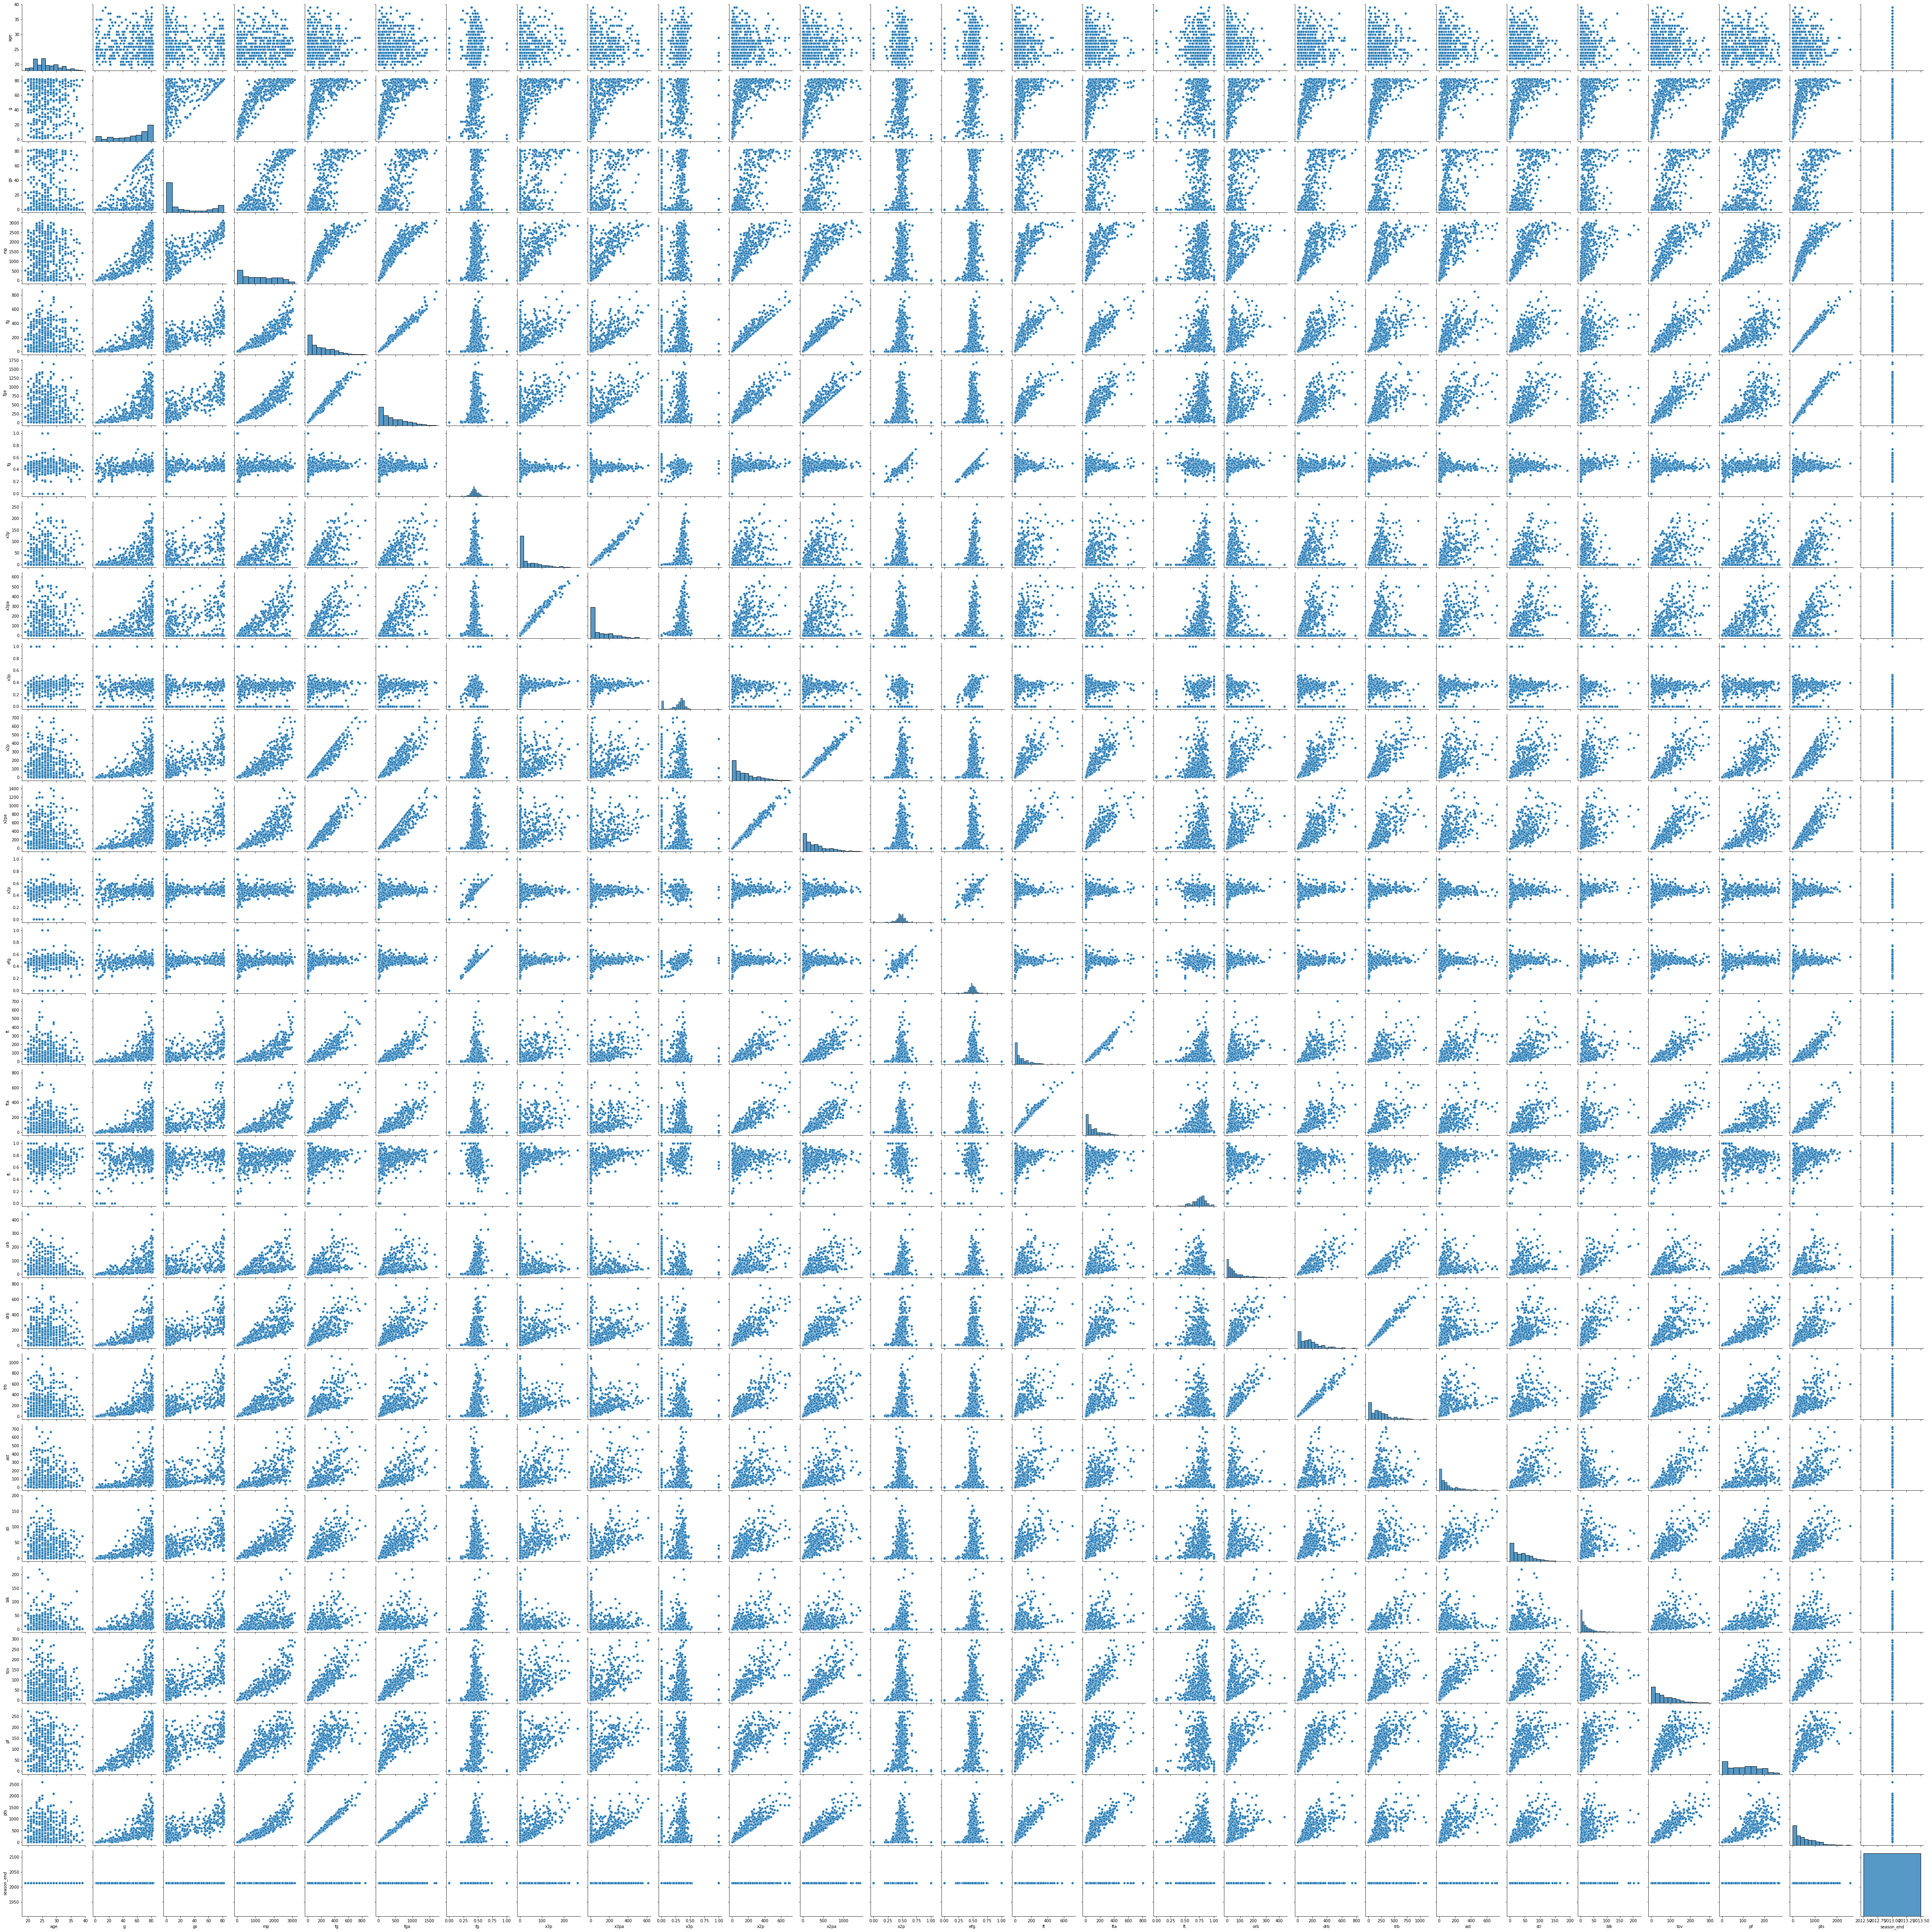

In [15]:
sns.pairplot(nba)

Looking at the pairplot of the entire data, there are so many features that it is hard to see each one, but we can see that there are some relationships that look linear.

To get rid of the null values, We are going to remove those columns.

In [66]:
nba = nba.drop(['fg.','x3p.','ft.'],axis=1)

In [22]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
x3p             0
x3pa            0
x2p             0
x2pa            0
x2p.            3
efg.            2
ft              0
fta             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [67]:
nba = nba.dropna()

nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
x3p             False
x3pa            False
x2p             False
x2pa            False
x2p.            False
efg.            False
ft              False
fta             False
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [68]:
nba.shape

(478, 28)

We removed the 3 columns that contained the most Null values, because one of the had 67, and that is far too many entries to remove from our total of 481. After removing those columns we still had a couple of null values, so we just got rid of those entries, bringing the total rows to 478.

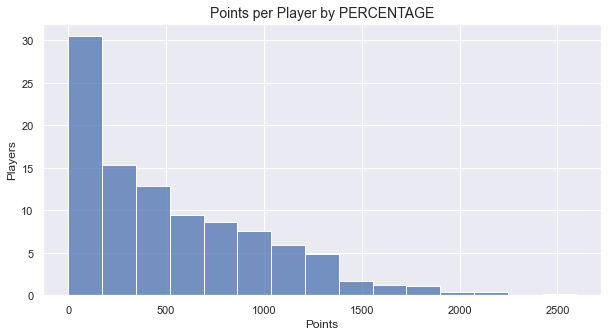

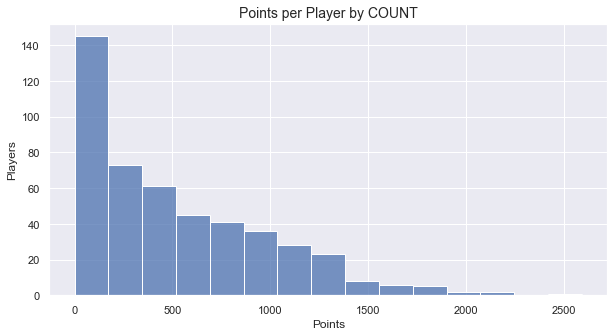

In [205]:
# Looking at a histogram of # of points for the players

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.histplot(nba["pts"], stat='percent')
plt.title("Points per Player by PERCENTAGE",fontsize=14)
plt.xlabel("Points",fontsize=12)
plt.ylabel("Players",fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(nba["pts"], stat='count')
plt.title("Points per Player by COUNT",fontsize=14)
plt.xlabel("Points",fontsize=12)
plt.ylabel("Players",fontsize=12)
plt.show()

We can see that the majority of platers (about 30% or 140) have between 0 and 175 points. The percentage of players goes down as we go up in points.

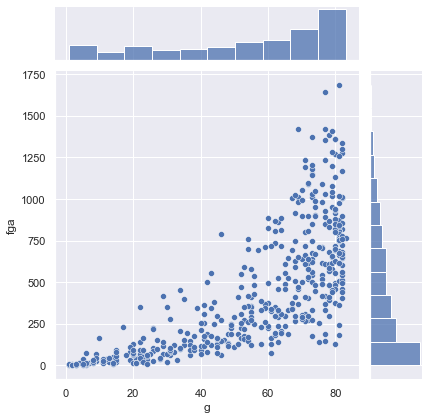

In [39]:
# Looking at Games Started and Field Goal Attempts
sns.jointplot(x='g', y='fga', data=nba)

Looking at Games played vs Field Goals Attempted, we can see what looks like an exponential relationship between them.

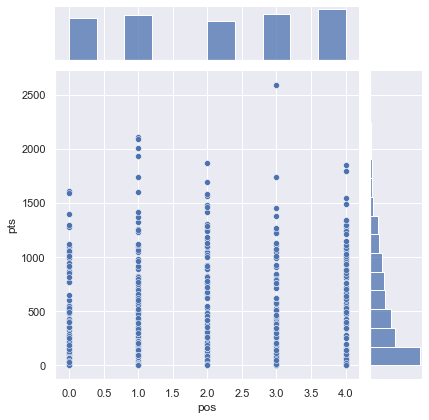

In [206]:
# Looking at Player Position and Points Scored to see if any correlation
sns.jointplot(x='pos', y='pts', data=nba)

Looks like points is mostly spread out amound the positions, none look like they are totally different from the others.

In [69]:
# Remove the players that are listed at positions outside of the traditional 5, sense those are what we are looking for.
print(nba[nba['pos'] == 'G'])
print(nba[nba['pos'] == 'F'])
nba = nba.drop(224)
nba = nba.drop(356)

           player pos  age bref_team_id  g  gs  mp  fg  fga  x3p  ...  drb  \
224  Damion James   G   26          SAS  5   1  50   2    9    0  ...   11   

     trb  ast  stl  blk  tov  pf  pts     season  season_end  
224   12    3    0    1    1   3    6  2013-2014        2013  

[1 rows x 28 columns]
          player pos  age bref_team_id  g  gs  mp  fg  fga  x3p  ...  drb  \
356  Josh Powell   F   31          HOU  1   0  19   2    6    0  ...    5   

     trb  ast  stl  blk  tov  pf  pts     season  season_end  
356    5    0    0    1    1   1    4  2013-2014        2013  

[1 rows x 28 columns]


In [70]:
nba.shape

(476, 28)

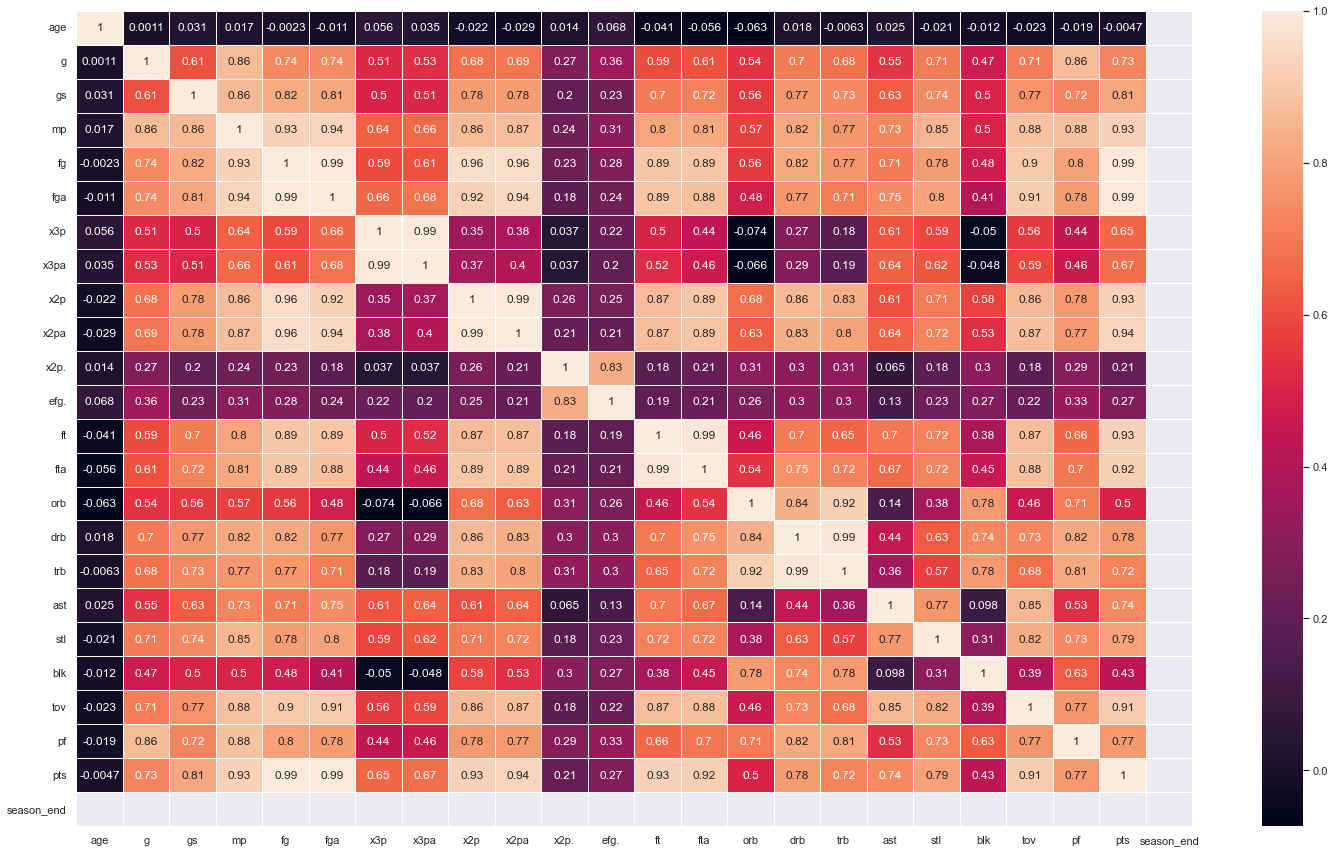

In [71]:
plt.figure(figsize = (25, 15))

corr = nba.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [73]:
# Change 'pos' to label so that it can be predicted easier
le = LabelEncoder()
nba['pos'] = le.fit_transform(nba['pos'])
nba['pos'].unique()

array([3, 0, 1, 4, 2], dtype=int64)

In [75]:
nba.head()

player  pos  age bref_team_id   g  gs    mp   fg   fga  x3p  ...  \
0     Quincy Acy    3   23          TOT  63   0   847   66   141    4  ...   
1   Steven Adams    0   20          OKC  81  20  1197   93   185    0  ...   
2    Jeff Adrien    1   27          TOT  53  12   961  143   275    0  ...   
3  Arron Afflalo    4   28          ORL  73  73  2552  464  1011  128  ...   
4  Alexis Ajinca    0   25          NOP  56  30   951  136   249    0  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 28 columns]

In [83]:
data = nba.drop(['player', 'bref_team_id', 'season', 'season_end'], axis=1)

data.head()

pos  age   g  gs    mp   fg   fga  x3p  x3pa  x2p  ...  fta  orb  drb  trb  \
0    3   23  63   0   847   66   141    4    15   62  ...   53   72  144  216   
1    0   20  81  20  1197   93   185    0     0   93  ...  136  142  190  332   
2    1   27  53  12   961  143   275    0     0  143  ...  119  102  204  306   
3    4   28  73  73  2552  464  1011  128   300  336  ...  336   32  230  262   
4    0   25  56  30   951  136   249    0     1  136  ...   67   94  183  277   

   ast  stl  blk  tov   pf   pts  
0   28   23   26   30  122   171  
1   43   40   57   71  203   265  
2   38   24   36   39  108   362  
3  248   35    3  146  136  1330  
4   40   23   46   63  187   328  

[5 rows x 24 columns]

# Model Building and Testing

### Split into Training and Testing

In [85]:
y = data['pos']

x = data.drop('pos', axis=1)

In [81]:
y

0      3
1      0
2      1
3      4
4      0
      ..
476    4
477    4
478    1
479    0
480    0
Name: pos, Length: 476, dtype: int64

In [86]:
x

age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  fta  orb  drb  \
0     23  63   0   847   66   141    4    15   62   126  ...   53   72  144   
1     20  81  20  1197   93   185    0     0   93   185  ...  136  142  190   
2     27  53  12   961  143   275    0     0  143   275  ...  119  102  204   
3     28  73  73  2552  464  1011  128   300  336   711  ...  336   32  230   
4     25  56  30   951  136   249    0     1  136   248  ...   67   94  183   
..   ...  ..  ..   ...  ...   ...  ...   ...  ...   ...  ...  ...  ...  ...   
476   20  72  16  1765  345   808   40   188  305   620  ...  326   69  159   
477   28  64   9  1810  387   889  135   350  252   539  ...  285   29  137   
478   25  79  78  2718  582  1283   90   292  492   991  ...  229  166  310   
479   21  82   3  1416  172   404    0     1  172   403  ...  200  118  235   
480   24  70   9  1049  156   290    0     1  156   289  ...  121  103  179   

     trb  ast  stl  blk  tov   pf   pts  
0    216   28   23   26   30  122   171  
1    332   43   40   57   71  203   265  
2    306   38   24   36   39  108   362  
3    262  248   35    3  146  136  1330  
4    277   40   23   46   63  187   328  
..   ...  ...  ...  ...  ...  ...   ...  
476  228  217   78   16  204  151   939  
477  166   95   46   12   95  156  1144  
478  476  182  167   36  165  213  1417  
479  353   92   40   41   87  170   490  
480  282   36   18   38   60  137   399  

[476 rows x 23 columns]

In [87]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size = 0.2)

print(x_train)
print(y_train)

     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  fta  orb  drb  \
360   36  66  27  1283   88   191   65   140   23    51  ...   12   36   93   
332   35  80  80  2628  633  1273  131   329  502   944  ...  376   40  458   
368   32  61  14  1141  126   327   37   108   89   219  ...   26   23   74   
338   22  70   9  1400  234   502   40   114  194   388  ...  122  140  225   
395   23  24   0   224   18    57    7    25   11    32  ...   15    2   12   
..   ...  ..  ..   ...  ...   ...  ...   ...  ...   ...  ...  ...  ...  ...   
233   26  64   0   741   98   208   31    74   67   134  ...   59   51  124   
100   29  41   0   265   55   117   33    79   22    38  ...   14    7   25   
325   39  15  10   313   36    94    8    24   28    70  ...   24    4   25   
386   24  53   1   578  111   220    0     0  111   220  ...   31   53   75   
369   21  69   4  1339  192   474   36    99  156   375  ...  173   26  103   

     trb  ast  stl  blk  tov   pf   pts  
360  129 

In [157]:
print(f'Number of Training Entries: {len(x_train)}')
print(f'Number of Testing Entries: {len(y_test)}')

Number of Training Entries: 380
Number of Testing Entries: 96


## KMeans Clustering

In [179]:
# 5 clusters for # of positions
kmeans = KMeans(n_clusters=5, random_state=123).fit(x_train)

In [188]:
import itertools

def label_permute_compare(ytdf, yp, n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    perms = list(itertools.permutations(list(range(n))))
    acc=[]
    for i in range(len(perms)):
        mapdict = dict(zip(list(ytdf.unique()),list(perms[i])))
        ytrue = ytdf.apply(lambda x: mapdict[x])
        acc.append(accuracy_score(ytrue,yp))
    idx = np.argmax(acc)    
    return perms[idx], acc[idx]


In [190]:
labelorder, acc = label_permute_compare(y_train, kmeans.labels_)
print(labelorder, acc)

(4, 3, 0, 2, 1) 0.25526315789473686


In [193]:
# display confusion matrix here 
mapdict = dict(zip(list(y_train.unique()),list(labelorder)))
yt = y_train.apply(lambda x: mapdict[x])
confusion_matrix(yt, kmeans.labels_)


array([[19, 11, 29,  7, 10],
       [18, 17, 23,  7, 11],
       [15, 17, 35,  7, 16],
       [13, 16, 18, 13, 12],
       [14, 13, 16, 10, 13]], dtype=int64)

We get an accuracy of 0.255 using KMeans. This is not very good, many things could be at play, most likely the stats between the positions is not unique enough for the algorithm to draw clear distinctions between them.

Let's see if Agglomerative Clustering does any better.

## Agglomerative Clustering

In [199]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
for linkage in ['ward', 'complete', 'average', 'single']:
    for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
        acc=0
        try:
            model = AgglomerativeClustering(n_clusters=5,linkage=linkage,affinity=affinity).fit(x_train)
            labelorder, acc = label_permute_compare(y_train, model.labels_)   
            print(linkage, affinity, labelorder, acc)    
        except:    
            print(linkage, 'with', affinity, 'not allowed.')

ward euclidean (4, 1, 3, 0, 2) 0.2710526315789474
ward with l1 not allowed.
ward with l2 not allowed.
ward with manhattan not allowed.
ward with cosine not allowed.
complete euclidean (1, 0, 4, 2, 3) 0.24736842105263157
complete l1 (4, 0, 1, 3, 2) 0.2789473684210526
complete l2 (1, 0, 4, 2, 3) 0.24736842105263157
complete manhattan (4, 0, 1, 3, 2) 0.2789473684210526
complete cosine (3, 4, 2, 0, 1) 0.24473684210526317
average euclidean (2, 0, 1, 3, 4) 0.2631578947368421
average l1 (0, 4, 1, 2, 3) 0.25
average l2 (2, 0, 1, 3, 4) 0.2631578947368421
average manhattan (0, 4, 1, 2, 3) 0.25
average cosine (4, 2, 0, 1, 3) 0.2394736842105263
single euclidean (4, 0, 2, 1, 3) 0.24736842105263157
single l1 (2, 1, 3, 0, 4) 0.2394736842105263
single l2 (4, 0, 2, 1, 3) 0.24736842105263157
single manhattan (2, 1, 3, 0, 4) 0.2394736842105263
single cosine (0, 2, 3, 1, 4) 0.22894736842105262


The highest accuracy we get for Agglomerative Clustering is 0.2789, with a linkage of Complete and an affinity of L1 (or Manhatten, they have the same accuracy). This is not much better than the Kmeans Model that we created earlier.

Let's create some supervised models and see if they fare any better.

## KNN Classification

In [186]:
accuracy = []
train_acc =[]
for n in range(1, 10):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy.append(report['accuracy'])
    train_acc.append(knn.score(x_train,y_train)*100)

In [187]:
for i in range(len(accuracy)):
    print('{} nearest neighbors:'.format(i))
    print('      Testing Accuracy  = {}'.format(accuracy[i]*100))
    print("      Training accuracy = {}".format(train_acc[i]))

0 nearest neighbors:
      Testing Accuracy  = 37.5
      Training accuracy = 100.0
1 nearest neighbors:
      Testing Accuracy  = 37.5
      Training accuracy = 71.05263157894737
2 nearest neighbors:
      Testing Accuracy  = 40.625
      Training accuracy = 69.47368421052632
3 nearest neighbors:
      Testing Accuracy  = 38.54166666666667
      Training accuracy = 68.42105263157895
4 nearest neighbors:
      Testing Accuracy  = 42.70833333333333
      Training accuracy = 66.57894736842105
5 nearest neighbors:
      Testing Accuracy  = 39.58333333333333
      Training accuracy = 63.94736842105263
6 nearest neighbors:
      Testing Accuracy  = 42.70833333333333
      Training accuracy = 63.68421052631579
7 nearest neighbors:
      Testing Accuracy  = 39.58333333333333
      Training accuracy = 61.578947368421055
8 nearest neighbors:
      Testing Accuracy  = 42.70833333333333
      Training accuracy = 59.73684210526316


The best accuracy on the testing and training sets that we got was with 4 nearest neighbors. 

    Testing Accuracy = 42.71
    Training Accuracy = 66.58

This is almost double the accuracy from the clustering models. 

## Logistic Regression

In [201]:
solver = ["newton-cg", "liblinear"]
for solver in solver:
    lr = LogisticRegression(solver=solver)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    print("{} Solver: Acc = {} ".format( solver, accuracy_score(y_test,y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

newton-cg Solver: Acc = 0.5625 
Confusion Matrix:
 [[10  4  0  0  0]
 [ 6 13  0  4  1]
 [ 0  0 10  0  8]
 [ 0  5  0  9  8]
 [ 1  0  3  2 12]]
liblinear Solver: Acc = 0.5520833333333334 
Confusion Matrix:
 [[12  1  0  0  1]
 [ 9  8  0  6  1]
 [ 2  0 10  0  6]
 [ 4  3  0  9  6]
 [ 1  0  2  1 14]]


From the two solvers that are compatable with the data, we get a higher accuracy from the newton-cg solver, with 0.5625.

# Analysis and Conclusion

So, it looks like our data is not a great fit for unsupervised learning. This could be many different reasons, not enough samples (only had 478) or it could be that the stats between the positions is not unique enough for the algorithms to draw clear distinctions between them, meaning that it was hard to cluster them with their position accurately.

Comparing them to Supervised models, the Supervised models performed much better, which makes sense. The positions are not different enough for the algorithm to cluster them, but when the players are labeled, the algorithm can find the patterns better. 

Github: https://github.com/JacobDerusha1/UnsupervisedFinal.git